In [75]:
import pandas as pd
import numpy as np
import sqlite3
import json

from PIL import Image


from matplotlib.path import Path

import matplotlib.pyplot as plt

In [76]:
def load_image(load_from='local', service=None, path=None):
    if (load_from == 'local') & (path is None):
        print('load_from local but no path supplied, will try to load from service')
    elif (load_from == 'local') & (path is not None):
        try:
            image = Image.open(path)
        except:
            print("excep")

    return image


image = load_image(path="c:\\temp\\mapillary_817255772895577.jpg")

In [77]:
#save outcomes
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('c://temp//green_repository2.db')

df_image_metadata = pd.read_sql('select * from image_metadata', conn)
df_detections = pd.read_sql('SELECT * FROM image_detection_coords', conn)


#df['properties'] = df['properties'].apply(json.loads)
#df['coordinates'] = df['coordinates'].apply(json.loads)

df_image_metadata = df_image_metadata.map(json.loads)
df_detections = df_detections.map(json.loads)

#df_detections['properties'] = df_detections['properties'].apply(json.loads)
#df_detections['coordinates'] = df_detections['coordinates'].apply(json.loads)

# Close the connection
conn.close()



In [78]:
df_detections = pd.merge(df_image_metadata,df_detections, left_on='image_id', right_on='image_id')

In [79]:
df_detections.head()

,image_source,image_id,captured_at_unix,lat,long,original_height,original_width,height,width,image_path_on_disk,detection_id,detection_label,feature_id,extent,properties,coordinates
0,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,1152,2048,c:\temp\mapillary_817255772895577.jpg,817376652883489,construction--barrier--fence,1,4096,{},"[[105, 538], [108, 535], [122, 533], [123, 531..."
1,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,1152,2048,c:\temp\mapillary_817255772895577.jpg,817376656216822,construction--barrier--fence,1,4096,{},"[[0, 430], [19, 432], [25, 429], [38, 428], [4..."
2,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,1152,2048,c:\temp\mapillary_817255772895577.jpg,817376659550155,construction--barrier--fence,1,4096,{},"[[0, 573], [3, 573], [3, 575], [11, 575], [15,..."
3,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,1152,2048,c:\temp\mapillary_817255772895577.jpg,817376662883488,construction--barrier--fence,1,4096,{},"[[327, 466], [333, 466], [348, 466], [358, 462..."
4,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,1152,2048,c:\temp\mapillary_817255772895577.jpg,817376666216821,construction--flat--road,1,4096,{},"[[1972, 106], [1969, 110], [1969, 119], [1971,..."


# Draw a map

In [81]:
def draw_polygon(polygon, max_size=3000):
    #print(detection_geometry['mpy-or']['geometry']['coordinates'])
    normalized_polygon = []
    w = []
    y = []
    for xy in polygon:

        w.append(xy[0])
        y.append(xy[1])




    #plt.plot(w, y, marker='o')  # marker='o' adds markers to the points

    fig, ax = plt.subplots(figsize=(8, 8))  # 8x8 inches
    ax.plot(w, y, marker='o', markersize=2) 

    # Set the x and y limits to be consistent
    #max_value = 3000  # Example maximum value
    ax.set_xlim(0, max_size)
    ax.set_ylim(0, max_size)
    
    # Force the two axes to intersect at 0
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Adding title and labels
    plt.title('Path Plot of w and y Coordinates')
    plt.xlabel('w')
    plt.ylabel('y')
    
    # Display the plot
    plt.show()

    return normalized_polygon
    

In [82]:
df_sample = df_detections.sample()
df_sample = df_detections[df_detections['detection_label'] == 'human--rider--motorcyclist']
df_sample.shape


(5, 16)

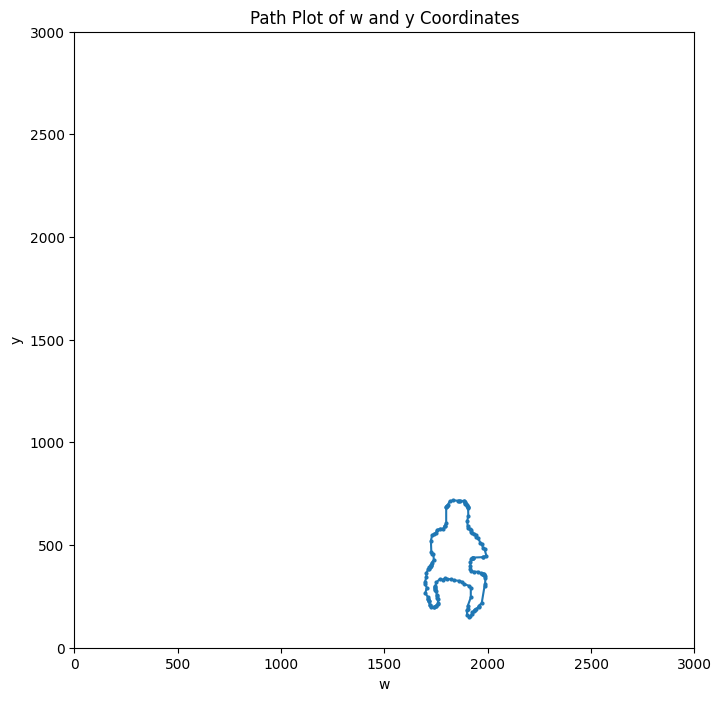

[]

In [54]:
draw_polygon(df_sample['coordinates'].tolist()[3], max_size=3000)

In [68]:
def draw_polygons(polygons, max_size=3000):
    #print(detection_geometry['mpy-or']['geometry']['coordinates'])
    normalized_polygon = []

    polygons_for_chart = []
    for polygon in polygons:
        w = []
        y = []
        for xy in polygon:

            w.append(xy[0])
            y.append(xy[1])
        polygons_for_chart.append([w,y])




    #plt.plot(w, y, marker='o')  # marker='o' adds markers to the points

    fig, ax = plt.subplots(figsize=(8, 8))  # 8x8 inches
    for shape in polygons_for_chart:
        ax.plot(shape[0], shape[1], marker='o', markersize=2) 
    #ax.plot(w, y, marker='o', markersize=2) 
    #ax.plot([10,100,100,10], [100,100,10,10], marker='o', markersize=2) 

    # Set the x and y limits to be consistent
    #max_value = 3000  # Example maximum value
    ax.set_xlim(0, max_size)
    ax.set_ylim(0, max_size)
    
    # Force the two axes to intersect at 0
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Adding title and labels
    plt.title('Path Plot of w and y Coordinates')
    plt.xlabel('w')
    plt.ylabel('y')
    
    # Display the plot
    plt.show()

    return normalized_polygon

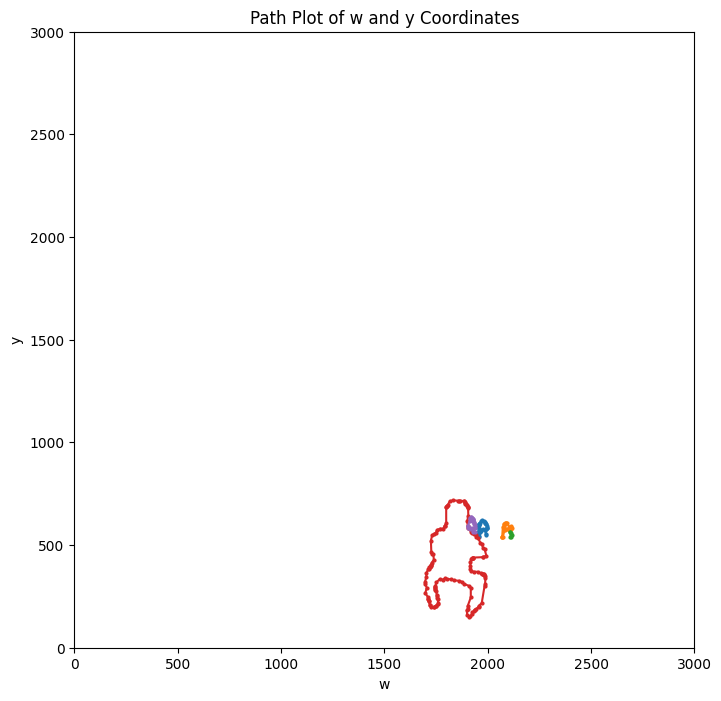

[]

In [70]:
draw_polygons(df_sample['coordinates'].tolist(), max_size=3000)

In [75]:
from collections import Counter
x = Counter(df['detection_id'].tolist())
x.most_common(4)

[('817377512883403', 9),
 ('817377566216731', 9),
 ('817376739550147', 6),
 ('817376989550122', 6)]

28    construction--structure--building
Name: detection_label, dtype: object


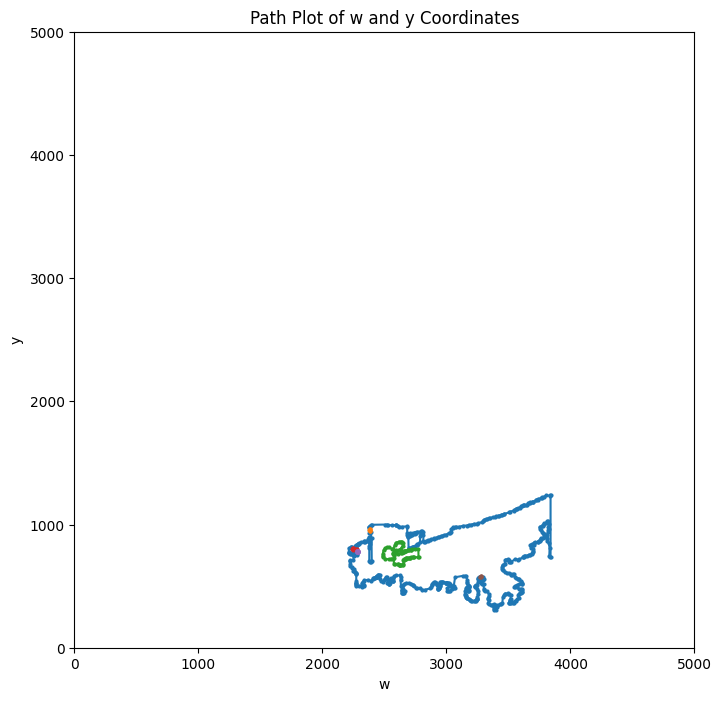

[]

In [85]:
df_sample = df[df['detection_id'] == '817376739550147']
print(df_sample['detection_label'].sample())
draw_polygons(df_sample['coordinates'].tolist(), max_size=5000)

In [73]:
df_sample

,image_source,image_id,captured_at_unix,lat,long,height,width,image_path_on_disk,detection_id,detection_label,feature_id,extent,properties,coordinates
308,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,c:\temp\mapillary_817255772895577.jpg,817377532883401,human--rider--motorcyclist,1,4096,{},"[[1954, 593], [1956, 596], [1956, 599], [1958,..."
309,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,c:\temp\mapillary_817255772895577.jpg,817377536216734,human--rider--motorcyclist,1,4096,{},"[[2070, 541], [2073, 589], [2079, 593], [2081,..."
310,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,c:\temp\mapillary_817255772895577.jpg,817377536216734,human--rider--motorcyclist,2,4096,{},"[[2110, 562], [2112, 558], [2115, 547], [2114,..."
312,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,c:\temp\mapillary_817255772895577.jpg,817377542883400,human--rider--motorcyclist,1,4096,{},"[[1712, 236], [1710, 247], [1698, 266], [1705,..."
319,mapillary,817255772895577,1664012504800,98.686175,3.609915,2160,3840,c:\temp\mapillary_817255772895577.jpg,817377562883398,human--rider--motorcyclist,1,4096,{},"[[1903, 591], [1912, 616], [1912, 631], [1920,..."


In [72]:
def draw_polygons_from_df(df, max_size=3000):
    polygons = row.coordinates
    #print(detection_geometry['mpy-or']['geometry']['coordinates'])
    normalized_polygon = []

    polygons_for_chart = []
    for polygon in polygons:
        w = []
        y = []
        for xy in polygon:

            w.append(xy[0])
            y.append(xy[1])
        polygons_for_chart.append([w,y])




    #plt.plot(w, y, marker='o')  # marker='o' adds markers to the points

    fig, ax = plt.subplots(figsize=(8, 8))  # 8x8 inches
    for shape in polygons_for_chart:
        ax.plot(shape[0], shape[1], marker='o', markersize=2) 
    #ax.plot(w, y, marker='o', markersize=2) 
    #ax.plot([10,100,100,10], [100,100,10,10], marker='o', markersize=2) 

    # Set the x and y limits to be consistent
    #max_value = 3000  # Example maximum value
    ax.set_xlim(0, max_size)
    ax.set_ylim(0, max_size)
    
    # Force the two axes to intersect at 0
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Adding title and labels
    plt.title('Path Plot of w and y Coordinates')
    plt.xlabel('w')
    plt.ylabel('y')
    
    # Display the plot
    plt.show()

    return normalized_polygon


In [71]:
image.height

1152

In [72]:
image.width

2048

In [88]:
mask.shape[0]

1152

In [98]:
mask[200].sum()

113

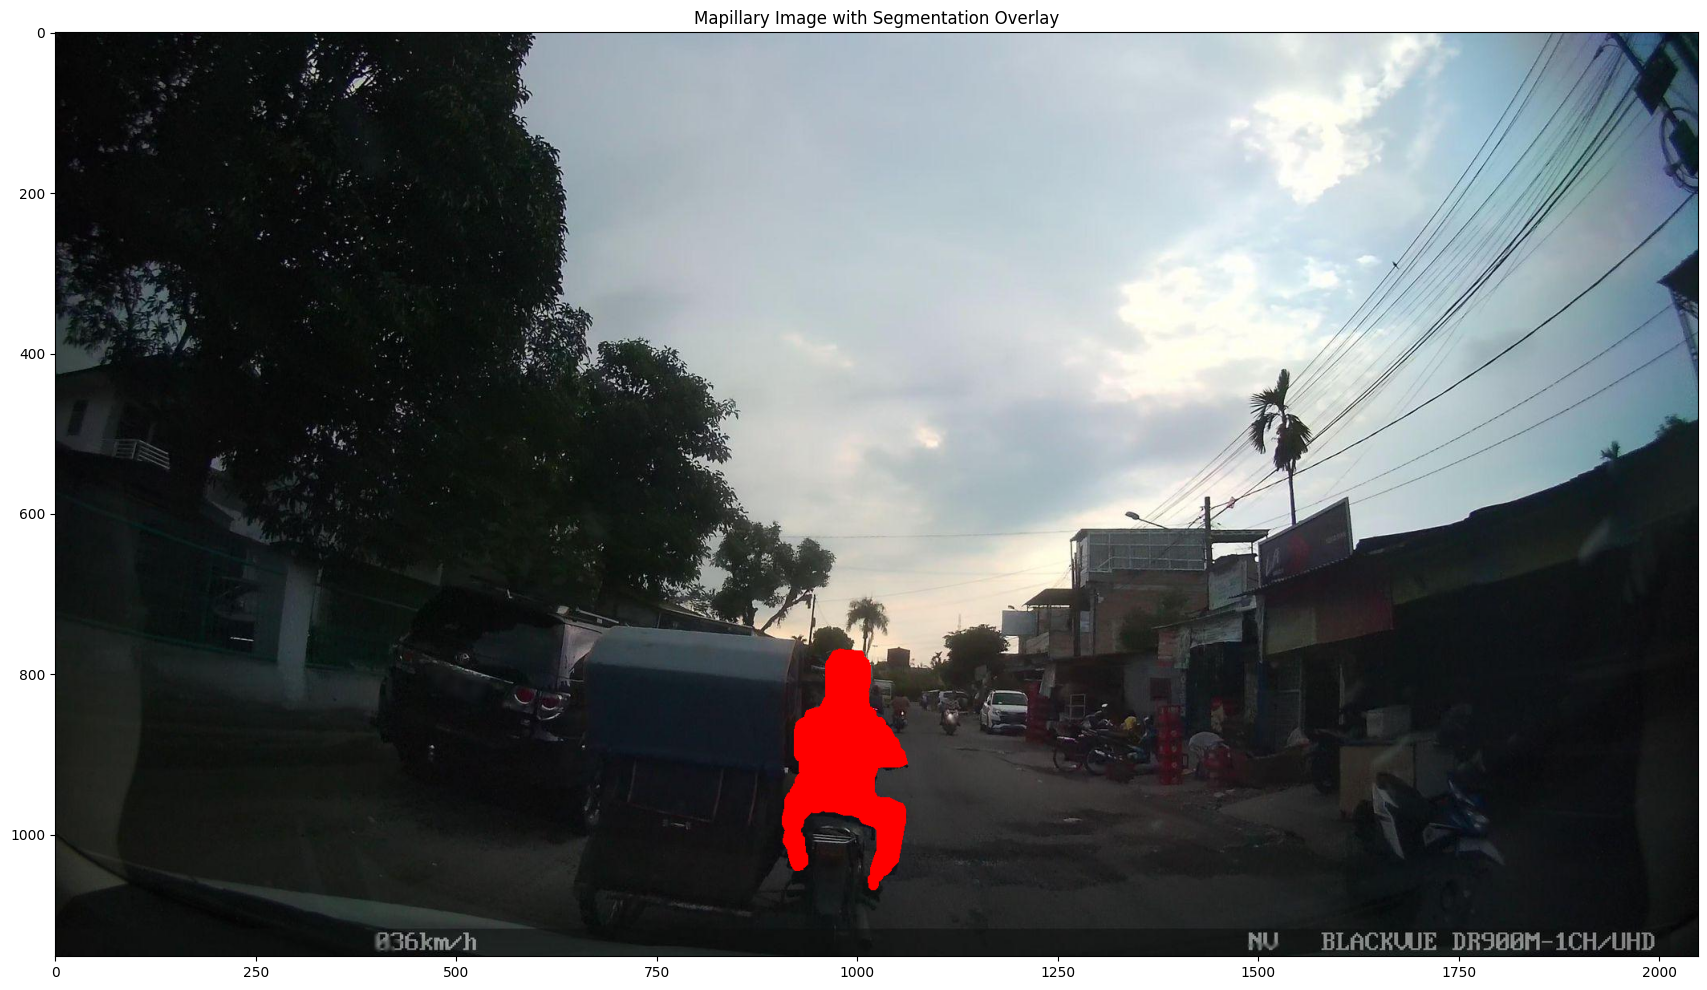

In [99]:
# Initialize an empty mask
mask = np.zeros((image.height, image.width), dtype=np.uint8)

def create_mask(mask, polygon, value):
    y, x = np.mgrid[:mask.shape[0], :mask.shape[1]]
    points = np.vstack((x.ravel(), y.ravel())).T
    path = Path(polygon)
    mask[path.contains_points(points).reshape(mask.shape)] = value




#x_poly = [[100,100],[500,100],[500,500],[100,500]]
#draw_polygons(mask, normalized_polygon, 1)
create_mask(mask, df_sample['coordinates'].tolist()[3], 1)

#reverse the mask on the horizontal dimension
mask = mask[::-1]


# Step 4: Overlay the mask on the image
masked_image = np.array(image)
masked_image[mask == 1] = [255, 0, 0]  # Color roads in red
masked_image[mask == 2] = [0, 0, 255]  # Color buildings in blue

# Step 5: Visualize the result
plt.figure(figsize=(24, 12))
plt.imshow(masked_image)
plt.title('Mapillary Image with Segmentation Overlay')
plt.show()